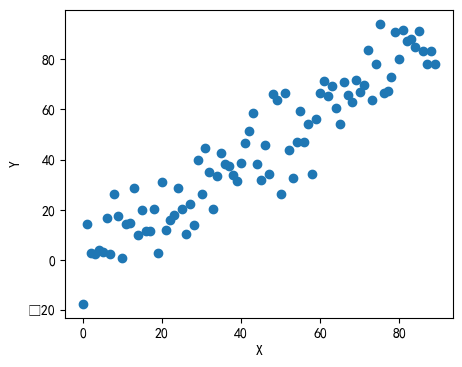

In [85]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['kaiti']

# 手动创建数据集
x = torch.Tensor(range(0, 100))  # 房子面积
y = x + torch.randn(100)*10  # 房价

# 将数据集划分为训练集与测试集
x_train = x[:-10]
y_train = y[:-10]

x_test = x[-10:]  # 取x的后10个
y_test = y[-10:]  # 取y的后10个

#  ******画图******
plt.figure(figsize=(5, 4))
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3528\1978767638.py:14: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([xplot, yplot],['Data', str1])


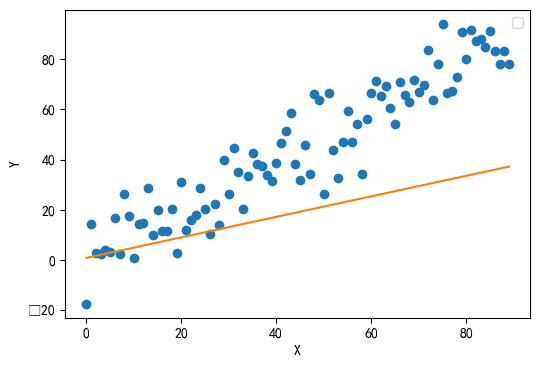

In [86]:
# 随机初始化参数
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

#  ******画图******
x_data = x_train.numpy()
plt.figure(figsize=(6,4))
xplot = plt.plot(x_data, y_train.data.numpy(), 'o')
yplot = plt.plot(x_data, w.data.numpy()*x_data+b.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
str1 = str(w.data.numpy())[0] + 'x' + str(b.data.numpy())[0]
plt.legend([xplot, yplot],['Data', str1])
plt.show()
#  ***************

epoch:0  loss: tensor(945.0690, grad_fn=<MeanBackward0>)
epoch:1  loss: tensor(392.0600, grad_fn=<MeanBackward0>)
epoch:2  loss: tensor(197.2356, grad_fn=<MeanBackward0>)
epoch:3  loss: tensor(128.5992, grad_fn=<MeanBackward0>)
epoch:4  loss: tensor(104.4187, grad_fn=<MeanBackward0>)
epoch:5  loss: tensor(95.8999, grad_fn=<MeanBackward0>)
epoch:6  loss: tensor(92.8987, grad_fn=<MeanBackward0>)
epoch:7  loss: tensor(91.8413, grad_fn=<MeanBackward0>)
epoch:8  loss: tensor(91.4687, grad_fn=<MeanBackward0>)
epoch:9  loss: tensor(91.3374, grad_fn=<MeanBackward0>)
epoch:10  loss: tensor(91.2911, grad_fn=<MeanBackward0>)
epoch:11  loss: tensor(91.2748, grad_fn=<MeanBackward0>)
epoch:12  loss: tensor(91.2690, grad_fn=<MeanBackward0>)
epoch:13  loss: tensor(91.2669, grad_fn=<MeanBackward0>)
epoch:14  loss: tensor(91.2661, grad_fn=<MeanBackward0>)
epoch:15  loss: tensor(91.2658, grad_fn=<MeanBackward0>)
epoch:16  loss: tensor(91.2657, grad_fn=<MeanBackward0>)
epoch:17  loss: tensor(91.2656, grad

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3528\3122454499.py:35: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([xplot, yplot],['Data', str1])


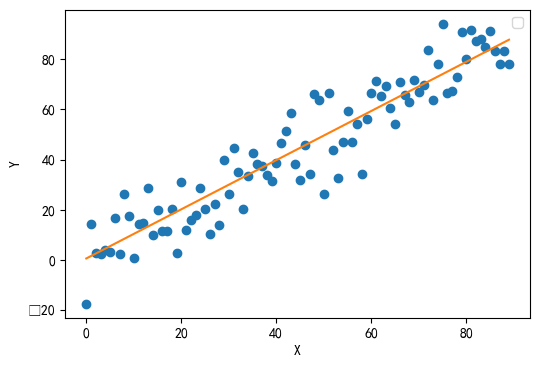

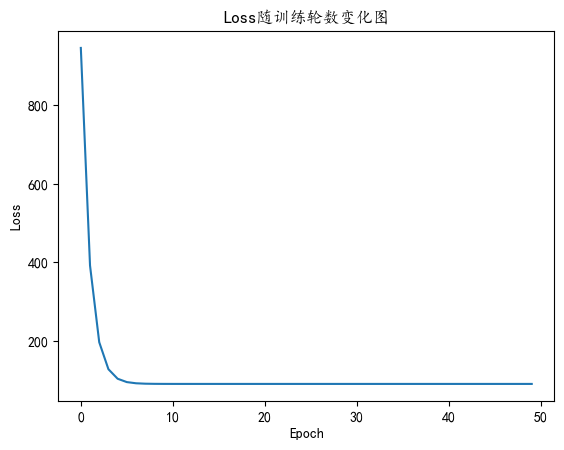

In [87]:
from torch import optim

learning_rate = 0.0003  # 学习率
epoch = 2000   # 训练轮数
loss_list = []
#optimizer = optim.Adam((w,b), lr=0.1)  # 优化器 第一个参数为需要训练的参数，lr为学习率


for i in range(epoch):
    #optimizer.zero_grad() # 将历史损失梯度清零
    y_predictions = w * x_train + b
    loss = torch.mean((y_predictions - y_train) ** 2)  # 定义损失函数 均方误差MSE
    loss.backward()   # 反向传播，计算梯度
    loss_list.append(loss.detach().numpy())
    print('epoch:'+ str(i),' loss:', loss)

    #optimizer.step()  # 使用优化器参数更新

    w.data = w.data - learning_rate * w.grad.data  # 根据梯度更新参数
    b.data = b.data - learning_rate * b.grad.data

    w.grad.data.zero_()  # 梯度清零
    b.grad.data.zero_()


#  ******画图******
x_data = x_train.numpy()
plt.figure(figsize=(6,4))
xplot = plt.plot(x_data, y_train.data.numpy(), 'o')
yplot = plt.plot(x_data, w.data.numpy() * x_data+b.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
str1 = str(w.data.numpy())[0] + 'x' + str(b.data.numpy())[0]
plt.legend([xplot, yplot],['Data', str1])
plt.show()

x = range(50)
y = loss_list[0:50]
plt.plot(x, y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss随训练轮数变化图') # 随着训练轮数Epoch增加，Loss在下降
plt.show()
#  ***************

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3528\2392529186.py:15: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([xplot, yplot],['Data', str1])


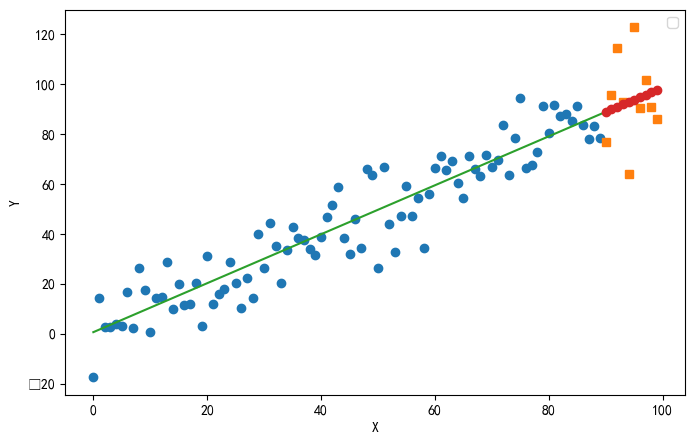

In [88]:
x_data = x_train.data.numpy()
x_pred = x_test.data.numpy()

#  ******画图******
plt.figure(figsize=(8,5))
plt.plot(x_data, y_train.numpy(), 'o')
plt.plot(x_pred, y_test.numpy(), 's')
x_data = np.r_[x_data, x_test.numpy()]
plt.plot(x_data, w.data.numpy()*x_data+b.data.numpy())
plt.plot(x_pred, w.data.numpy()*x_pred+b.data.numpy(), 'o')

plt.xlabel('X')
plt.ylabel('Y')
str1 = str(w.data.numpy())[0] + 'x' + str(b.data.numpy())[0]
plt.legend([xplot, yplot],['Data', str1])
plt.show()
#  ***************